# Langkah 1 - Ilustrasi Data Non-Linier

## Langkah 1a - Import Library

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

## Langkah 1b - Buat Kembali Fungsi Plotting

In [2]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## Langkah 1c - Buat Data Dummy Non-Linier

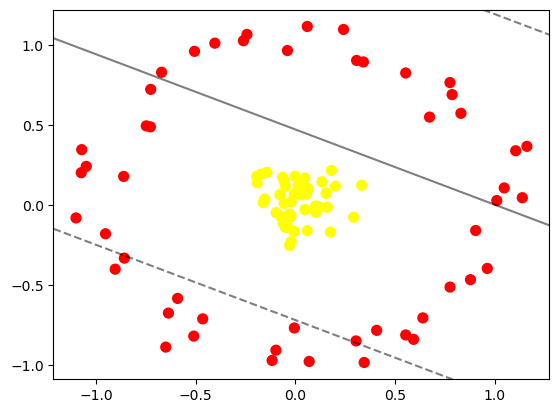

In [3]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [5]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# Hitung jarak radial dari origin
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.05685157,  0.14962954],
       [ 0.05630048,  0.10536917],
       [ 0.04615663,  0.10302494],
       [ 0.34461619, -0.98434601],
       [ 0.33185865,  0.12325905],
       [-0.05721206,  0.0102675 ],
       [ 0.87769517, -0.46687844],
       [ 1.1608965 ,  0.3663897 ],
       [-0.11726178, -0.97152126],
       [-0.67164226,  0.82951405],
       [-0.72758653,  0.48811982],
       [ 0.05860192, -0.16085853],
       [-0.7483373 ,  0.49425699],
       [-0.14331285,  0.20395586],
       [ 0.18014676,  0.21524375],
       [ 1.13773554,  0.04531838],
       [ 0.77487702,  0.76516676],
       [-0.09818688, -0.9075695 ],
       [-0.63737266, -0.67553165],
       [-0.46538963, -0.71187554],
       [-0.86184864,  0.17858411],
       [-1.07240986,  0.34567608],
       [-0.05219796, -0.09742773],
       [-0.00696605, -0.16440069],
       [ 0.77536724, -0.51311034],
       [-0.26127435,  1.02668342],
       [-0.90445777, -0.40123035],
       [

# Langkah 2 - Fitting Model

In [6]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


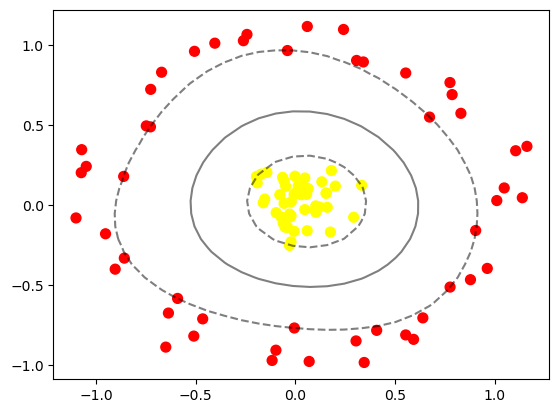

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')